In [1]:
import numpy as np
import pytorch_network
import torch
from torch import nn
import tqdm

from utils import get_aligned_representations
from idnns.information.information_process import get_information
from plot_information import plot_information_plane
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# import importlib
# importlib.reload(pytorch_network)

In [2]:
model = pytorch_network.MLPWithInfo(output_activation=None)

In [3]:
model

MLPWithInfo(
  (model): ModuleList(
    (0): Linear(in_features=12, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=7, bias=True)
    (3): Tanh()
    (4): Linear(in_features=7, out_features=5, bias=True)
    (5): Tanh()
    (6): Linear(in_features=5, out_features=4, bias=True)
    (7): Tanh()
    (8): Linear(in_features=4, out_features=3, bias=True)
    (9): Tanh()
    (10): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [4]:
model.info_layers_numbers

[1, 3, 5, 7, 9, 11]

In [5]:
X, y = pytorch_network.load_tishby_toy_dataset('./data/g1.mat')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9)

In [6]:
# model = pytorch_network.MLPWithInfo(output_activation=None)



epochs = 100
train_res = pytorch_network.train_network(model, X_train, y_train.astype(np.int),
                                          X_test, y_test.astype(np.int), batch_size=12, epochs=epochs)

100%|██████████| 100/100 [00:36<00:00,  2.83it/s]


Restore original ordering of samples, align with input/output

In [6]:
ws = model.representations_per_epochs
order = train_res[2]

ws = get_aligned_representations(ws, order)

In [7]:
assert len(model.representations_per_epochs) == epochs
assert len(model.representations_per_epochs[0]) == len(model.info_layers_numbers)

for i in range(len(model.representations_per_epochs[0])):
    assert(model.representations_per_epochs[0][i].shape[0] == X_train.shape[0])

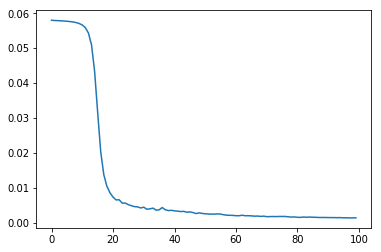

In [7]:
plt.plot(np.arange(len(train_res[0])), train_res[0])

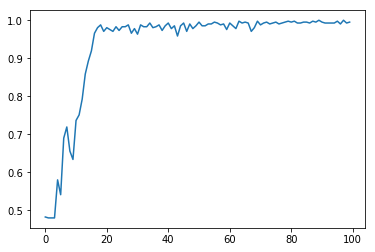

In [8]:
plt.plot(np.arange(len(train_res[1])), train_res[1])

In [11]:
# non_robust_model = pytorch_network.MLPWithInfo(output_activation=nn.Sigmoid)


In [15]:
ws[0]

[array([[-6.4698321e-01,  2.3776819e-01, -7.2051082e-03, ...,
         -6.8894565e-01, -4.3287098e-01, -3.5470292e-02],
        [ 2.5310367e-01,  5.5209253e-02, -6.7377710e-03, ...,
         -5.3732139e-01, -5.3825438e-02, -9.2864037e-05],
        [-6.6463804e-01,  4.6509400e-01,  4.1707173e-01, ...,
         -6.5379697e-01,  1.1445156e-01,  5.5549383e-01],
        ...,
        [-4.6598679e-01, -2.0915477e-01,  6.1388385e-01, ...,
         -3.8278612e-01, -2.0146947e-01,  2.1311504e-01],
        [ 5.4280013e-01,  5.7715887e-01, -4.5258081e-01, ...,
         -8.2702112e-01,  1.9574583e-01,  4.2465124e-01],
        [-2.6434836e-01,  7.8141654e-01,  2.9305214e-01, ...,
         -6.6546917e-02,  3.3763224e-01,  5.0248039e-01]], dtype=float32),
 array([[ 0.52927065, -0.26976815,  0.19141886, ...,  0.20142241,
          0.01014072, -0.21905668],
        [ 0.42712572, -0.32822984,  0.13917899, ...,  0.257782  ,
         -0.01866631,  0.05034271],
        [ 0.44741067,  0.30778745,  0.3830676 

In [12]:
num_of_bins = 40
every_n = 10
IXT_array, ITY_array = get_information(ws, X_train, np.concatenate([y_train, 1 - y_train], axis=1), 
                                       num_of_bins, every_n=every_n, return_matrices=True)

Start calculating the information...
Processed epoch 0
Processed epoch 70Processed epoch 40

Processed epoch 10
Processed epoch 30
Processed epoch 20
Processed epoch 50Processed epoch 60

Processed epoch 80
Processed epoch 130
Processed epoch 100
Processed epoch 90
Processed epoch 150
Processed epoch 140
Processed epoch 110
Processed epoch 120
Processed epoch 160
Processed epoch 190
Processed epoch 180
Processed epoch 170
Processed epoch 200
Processed epoch 230Processed epoch 210

Processed epoch 220
Processed epoch 240
Processed epoch 250
Processed epoch 260
Processed epoch 300
Processed epoch 270
Processed epoch 290
Processed epoch 280
Processed epoch 310
Processed epoch 320
Processed epoch 330
Processed epoch 370
Processed epoch 360
Processed epoch 340
Processed epoch 380
Processed epoch 350
Processed epoch 390
Processed epoch 400
Processed epoch 410
Processed epoch 440
Processed epoch 420
Processed epoch 450
Processed epoch 430
Processed epoch 460
Processed epoch 470
Processed epoc

In [38]:
import importlib

In [60]:
import plot_information

In [74]:
importlib.reload(plot_information)

<module 'plot_information' from '/Users/kochka/.yandex.disk/381025959/Yandex.Disk.localized/skoltech/large scape opt/project/tishby_sharlatan/plot_information.py'>

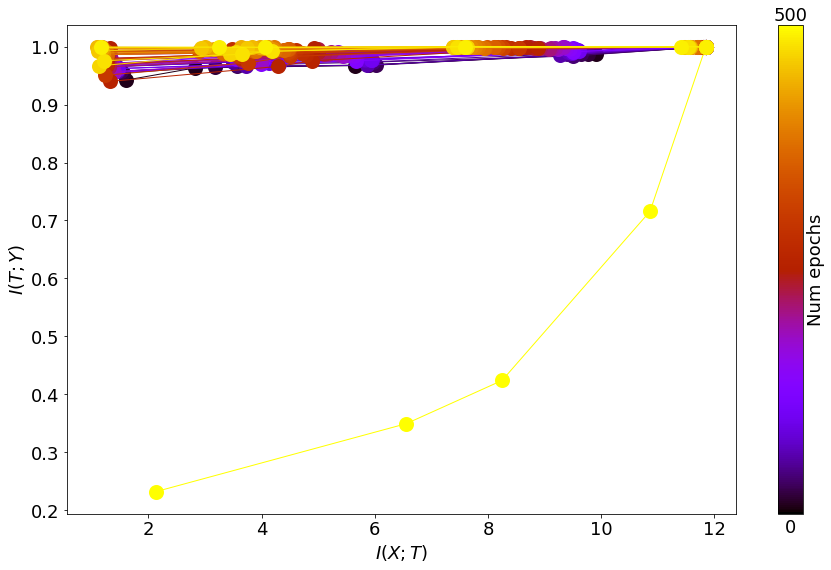

In [75]:
plot_information.plot_information_plane(IXT_array, ITY_array, num_epochs=epochs, every_n=every_n)